## 1 获取买房价格

In [48]:
from selenium import webdriver
import pandas as pd

driver=webdriver.Firefox()

ur1="https://cq.esf.fang.com/house-a056/"

driver.get(ur1)

#用于收集数据
data=[]

#循环抓取页面内容
for pagenum in range(20):


    #找到价格信息
    price=driver.find_elements('class name','price_right')
    house_count=len(price)
    # 查看该面有多少房print(house_count)

    #循环录入该页的价格信息
    for i in range(house_count):
        #读取为字符串，以\n分割
        price_information=price[i].text.split('\n')
        # 查看是否正确读取： print(price_information)
        #添加到数据集
        data.append(price_information)
        
    #检查数据：print(data)

    if i<20:
        #找到翻页键
        try:
            #需要注意，有两个完全重名的class，因此用elemnets。当然，用element也可以，但只会读取第一个。
            find_next_page=driver.find_elements('class name','last')
            # print(find_next_page)
            next_page=find_next_page[0]
            # print(next_page)
        except:
            print('Do not find the element')
        #该面录入完成后，翻页
        next_page.click()

driver.quit()
#导入到pandas格式
df=pd.DataFrame(data)
print(df)


         0         1         2
0     165万  13200元/㎡  低于市场价58万
1     210万  16068元/㎡      None
2     300万  20689元/㎡      None
3     145万  13567元/㎡  低于市场价34万
4     268万  16441元/㎡      None
...    ...       ...       ...
1195  150万  16814元/㎡  低于市场价33万
1196  188万  12702元/㎡  低于市场价35万
1197  110万   9243元/㎡      None
1198   85万  11038元/㎡      None
1199  110万  11767元/㎡      None

[1200 rows x 3 columns]


In [50]:
#清洗数据
df[0]=df[0].str.replace('万','')
df[1]=df[1].str.replace('元/㎡','')
df.drop(columns=[2], inplace=True)
df.columns = ['总价（万元）', '单价（元/㎡）']
df['总价（万元）']=df['总价（万元）'].astype("float")
df['单价（元/㎡）']=df['单价（元/㎡）'].astype("float")
df["总面积"]=df['总价（万元）']*10000/df['单价（元/㎡）']
df["总面积"]=df["总面积"].astype("int")
print(df)
# 保存
df.to_excel("Price_of_buying.xlsx",header=True,index=False)
print("File has been saved")

      总价（万元）  单价（元/㎡）  总面积
0      165.0  13200.0  125
1      210.0  16068.0  130
2      300.0  20689.0  145
3      145.0  13567.0  106
4      268.0  16441.0  163
...      ...      ...  ...
1195   150.0  16814.0   89
1196   188.0  12702.0  148
1197   110.0   9243.0  119
1198    85.0  11038.0   77
1199   110.0  11767.0   93

[1200 rows x 3 columns]
File has been saved


## 2 获取租房价格

In [52]:
from selenium import webdriver
import pandas as pd

driver2=webdriver.Firefox()

ur2='https://cq.zu.fang.com/house-a056/'

driver2.get(ur2)

#用于收集数据
data1=[]
data2=[]

#循环抓取页面内容
for pagenum in range(8):
    
    #找到价格信息
    rent_information=driver2.find_elements('class name','price') #总价
    rent_information2=driver2.find_elements('class name','font15') #面积等
    Total_num=len(rent_information)
    
    #print(Total_num)
    for i in range(Total_num):
        #出租信息
        data1.append(rent_information2[i].text.split('|'))
        #出租价格
        data2.append(rent_information[i].text)
    #检查数据：print(data2)
    
    #该面录入完成后，翻页，注意该信息仅8页，最后一页不应再翻页
    if pagenum<7:
        try:
            #需要注意，有两个完全重名的class，因此用elemnets。当然，用element也可以，但只会读取第一个。
            find_next_page=driver2.find_elements('link text',"下一页")
            # print(find_next_page)
        except:
            print('Do not find the element in page',i+1)
        find_next_page[0].click()

#导入到pandas格式
df2=pd.DataFrame(data1)
df2.insert(0,'总价格（元）',data2)
print(df2)
driver2.quit()

    总价格（元）   0     1     2    3
0     6000  整租  4室2厅  207㎡  朝东北
1     8000  整租  5室2厅  245㎡   朝南
2     6000  整租  3室2厅  130㎡   朝南
3     8000  整租  3室2厅  147㎡   朝南
4     4500  整租  2室2厅  113㎡   朝东
..     ...  ..   ...   ...  ...
454   6000  整租  3室2厅  134㎡   朝南
455   4500  整租  2室1厅   59㎡   朝南
456   1500  整租  1室0厅   28㎡  朝东南
457   1800  整租  3室2厅   97㎡   朝南
458   2600  整租  2室1厅   55㎡   朝南

[459 rows x 5 columns]


In [53]:
#清洗数据
#df1=df2
df2.columns = ['总价（元）', '合租类型','户型','面积（㎡）','朝向']
df2['面积（㎡）']=df2['面积（㎡）'].str.replace('㎡','')

df2.drop(columns=['户型'], inplace=True)
df2.drop(columns=['朝向'], inplace=True)
df2.drop(columns=['合租类型'],inplace=True)
print(df2)
df2['总价（元）']=df2['总价（元）'].astype("float")
df2['面积（㎡）']=df2['面积（㎡）'].astype("float")
df2["每平米价格"]=df2["总价（元）"]/df2["面积（㎡）"]
print(df2)
#print(df1)

df2.to_excel("Price_of_Renting.xlsx",header=True,index=False)


    总价（元） 面积（㎡）
0    6000   207
1    8000   245
2    6000   130
3    8000   147
4    4500   113
..    ...   ...
454  6000   134
455  4500    59
456  1500    28
457  1800    97
458  2600    55

[459 rows x 2 columns]
      总价（元）  面积（㎡）      每平米价格
0    6000.0  207.0  28.985507
1    8000.0  245.0  32.653061
2    6000.0  130.0  46.153846
3    8000.0  147.0  54.421769
4    4500.0  113.0  39.823009
..      ...    ...        ...
454  6000.0  134.0  44.776119
455  4500.0   59.0  76.271186
456  1500.0   28.0  53.571429
457  1800.0   97.0  18.556701
458  2600.0   55.0  47.272727

[459 rows x 3 columns]


## 3、描述性统计：
### 注：由于不同组员的数据格式不同，总体数据的处理主要由excel完成。用python处理的方式，可参考上一部分数据清洗步骤。
#### 经汇总本组数据，在excel文件中对数据进行了基本的清洗和汇总。再次读取处理后数据，进行描述性统计如下所示。

1、可以看到，购房价格数据中均价为16053元每平米，中位数为14765元每平米。从最大值和各个四分位数来看，数据存在位于三个标准差外的数值。

2、租房价格数据中均价为49元每平米每月，中位数为31元每平米每月。从最大值和各个四分位数来看，数据存在位于三个标准差外的数值。

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 读取购房数据 0为汇总数据，1到4为4个地区分数据
buydata0=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\Buyprice.xlsx')
buydata1=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\渝中Price_of_buying.xlsx')
buydata2=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\渝北Price_of_buying.xlsx')
buydata3=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\南岸Price_of_buying.xlsx')
buydata4=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\江北Price_of_buying.xlsx')

# 读取租房数据 同上
rentdata0=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\Rentprice.xlsx')
rentdata1=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\渝中Price_of_Renting.xlsx')
rentdata2=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\渝北Price_of_Renting.xlsx')
rentdata3=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\南岸Price_of_Renting.xlsx')
rentdata4=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\江北Price_of_Renting.xlsx')

# 描述性统计
print('以下为购房数据的描述性统计：\n')
print(buydata0.describe(),'\n')
print(buydata1.describe(),'\n')
print(buydata2.describe(),'\n')
print(buydata3.describe(),'\n')
print(buydata4.describe(),'\n')

print('------------------------------------------------------------------','\n')
print('以下为租房数据的描述性统计：\n')
print(rentdata0.describe(),'\n')
print(rentdata1.describe(),'\n')
print(rentdata2.describe(),'\n')
print(rentdata3.describe(),'\n')
print(rentdata4.describe(),'\n')

以下为购房数据的描述性统计：

       Total price  squareMeter  PricePerSquare    Location1    Location2  \
count  4786.000000  4786.000000     4786.000000  4786.000000  4786.000000   
mean    270.871431   155.216047    16053.825533     0.250731     0.247806   
std     299.642944    94.948212     6424.853251     0.433479     0.431784   
min      31.600000    31.000000     5237.000000     0.000000     0.000000   
25%     130.000000   100.000000    11736.750000     0.000000     0.000000   
50%     198.000000   134.000000    14765.000000     0.000000     0.000000   
75%     310.000000   172.000000    18645.000000     1.000000     0.000000   
max    4997.000000  1229.000000    91090.000000     1.000000     1.000000   

         Location3    Location4  
count  4786.000000  4786.000000  
mean      0.250731     0.250731  
std       0.433479     0.433479  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000

## 4、计算租售比，绘图

总租售比: 476 

渝中租售比: 410 

渝北租售比: 492 

南岸租售比: 546 

江北租售比: 476 



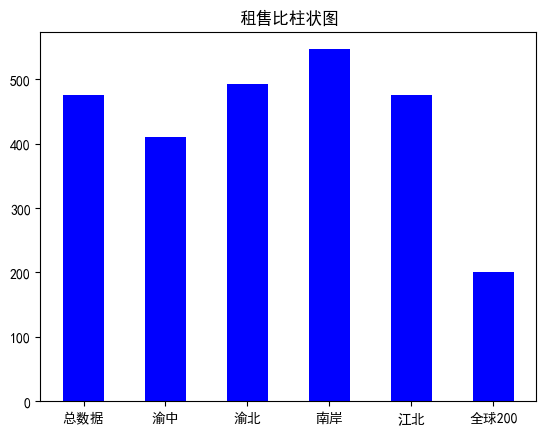

In [37]:
import matplotlib.pyplot as plt

# 计算租售比
Ratio0=buydata0['PricePerSquare'].median()/rentdata0['PricePerSquare'].median()
Ratio1=buydata0['PricePerSquare'].median()/rentdata1['PricePerSquare'].median()
Ratio2=buydata0['PricePerSquare'].median()/rentdata2['PricePerSquare'].median()
Ratio3=buydata0['PricePerSquare'].median()/rentdata3['PricePerSquare'].median()
Ratio4=buydata0['PricePerSquare'].median()/rentdata4['PricePerSquare'].median()
print('总租售比:',int(Ratio0),'\n')
print('渝中租售比:',int(Ratio1),'\n')
print('渝北租售比:',int(Ratio2),'\n')
print('南岸租售比:',int(Ratio3),'\n')
print('江北租售比:',int(Ratio4),'\n')

# 绘图

# 设置字体，防止无法显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

catagory=['总数据','渝中','渝北','南岸','江北','全球200']
value=[Ratio0,Ratio1,Ratio2,Ratio3,Ratio4,200]
plt.bar(catagory,value,width=0.5,color='blue')
plt.title('租售比柱状图')
plt.show()


## 5、回归分析

#### 预处理数据 

In [144]:
# 读取数据, 检查数据格式
#buydata0=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\Buyprice.xlsx')
#rentdata0=pd.read_excel(r'D:\大三 下\人工智能与python程序设计\homework\HW3\Rentprice.xlsx')

#生成交叉项
buydata0['Location1*totalsquare']=buydata0['Location1']*buydata0['squareMeter']
buydata0['Location2*totalsquare']=buydata0['Location2']*buydata0['squareMeter']
buydata0['Location3*totalsquare']=buydata0['Location3']*buydata0['squareMeter']
buydata0['Location4*totalsquare']=buydata0['Location4']*buydata0['squareMeter']

rentdata0['Location1*totalsquare']=rentdata0['Location1']*rentdata0['squareMeter']
rentdata0['Location2*totalsquare']=rentdata0['Location2']*rentdata0['squareMeter']
rentdata0['Location3*totalsquare']=rentdata0['Location3']*rentdata0['squareMeter']
rentdata0['Location4*totalsquare']=rentdata0['Location4']*rentdata0['squareMeter']

# print(buydata0)
# print(rentdata0)

#### 回归分析

以下为回归分析结果：

可以看到，绝大多数系数显著。

总体来说，售房价格与面积和地区有关，且与二者交叉项也显著。租房价格关于面积和地区有关，但面积的检验系数不如售房的系数显著。说明从租房来说，区位可能是更主要的影响因素。

#### 售房价格回归：

In [150]:
import statsmodels.api as sm

print('-----------------------------------------------------\n')
print('以下为售房价格的回归 ：\n')

y_buy=buydata0['PricePerSquare']
x_buy=buydata0[['squareMeter','Location1','Location2','Location3','Location4','Location1*totalsquare','Location2*totalsquare','Location3*totalsquare','Location4*totalsquare']]
model_buy=sm.OLS(y_buy,x_buy)
result_buy=model_buy.fit()
print(result_buy.summary())

print('\n-----------------------------------------------------\n')
print('以下为租房价格的回归 ：\n')

y_rent=rentdata0['PricePerSquare']
x_rent=rentdata0[['squareMeter','Location1','Location2','Location3','Location4','Location1*totalsquare','Location2*totalsquare','Location3*totalsquare','Location4*totalsquare']]
model_rent=sm.OLS(y_rent,x_rent)
result_rent=model_rent.fit()
print(result_rent.summary())

-----------------------------------------------------

以下为售房价格的回归 ：

                            OLS Regression Results                            
Dep. Variable:         PricePerSquare   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          1.02e-215
Time:                        18:05:25   Log-Likelihood:                -48244.
No. Observations:                4786   AIC:                         9.650e+04
Df Residuals:                    4778   BIC:                         9.656e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

## 6、预测和绘图

### 预测：

In [90]:
# 生成新的预测数据
new_x_50_1=[50,1,0,0,0,50,0,0,0]
new_x_50_2=[50,0,1,0,0,0,50,0,0]
new_x_50_3=[50,0,0,1,0,0,0,50,0]
new_x_50_4=[50,0,0,0,1,0,0,0,50]

new_x_100_1=[100,1,0,0,0,100,0,0,0]
new_x_100_2=[100,0,1,0,0,0,100,0,0]
new_x_100_3=[100,0,0,1,0,0,0,100,0]
new_x_100_4=[100,0,0,0,1,0,0,0,100]

In [152]:
print('50平 渝中 售房价格预测：',result_buy.predict(new_x_50_1))
print('50平 渝北 售房价格预测：',result_buy.predict(new_x_50_2))
print('50平 南岸 售房价格预测：',result_buy.predict(new_x_50_3))
print('50平 江北 售房价格预测：',result_buy.predict(new_x_50_4))
print('100平 渝中 售房价格预测：',result_buy.predict(new_x_100_1))
print('100平 渝北 售房价格预测：',result_buy.predict(new_x_100_2))
print('100平 南岸 售房价格预测：',result_buy.predict(new_x_100_3))
print('100平 江北 售房价格预测：',result_buy.predict(new_x_100_4))

print('50平 渝中 租房价格预测：',result_rent.predict(new_x_50_1))
print('50平 渝北 租房价格预测：',result_rent.predict(new_x_50_2))
print('50平 南岸 租房价格预测：',result_rent.predict(new_x_50_3))
print('50平 江北 租房价格预测：',result_rent.predict(new_x_50_4))
print('100平 渝中 租房价格预测：',result_rent.predict(new_x_100_1))
print('100平 渝北 租房价格预测：',result_rent.predict(new_x_100_2))
print('100平 南岸 租房价格预测：',result_rent.predict(new_x_100_3))
print('100平 江北 租房价格预测：',result_rent.predict(new_x_100_4))


50平 渝中 售房价格预测： [11680.80385002]
50平 渝北 售房价格预测： [15250.37414528]
50平 南岸 售房价格预测： [11367.81824656]
50平 江北 售房价格预测： [15505.62922958]
100平 渝中 售房价格预测： [14146.23108555]
100平 渝北 售房价格预测： [16284.90905242]
100平 南岸 售房价格预测： [12576.51449298]
100平 江北 售房价格预测： [16006.556677]
50平 渝中 租房价格预测： [32.58726656]
50平 渝北 租房价格预测： [80.14939199]
50平 南岸 租房价格预测： [26.76697658]
50平 江北 租房价格预测： [33.96689906]
100平 渝中 租房价格预测： [36.89147721]
100平 渝北 租房价格预测： [59.19401038]
100平 南岸 租房价格预测： [32.72278087]
100平 江北 租房价格预测： [34.24000386]


### 绘图：

#### Plot A SquareMeter=50

渝中租售比: 358 

渝北租售比: 190 

南岸租售比: 424 

江北租售比: 456 



C:\Users\86188\AppData\Local\Temp\ipykernel_23056\3619166193.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ratio1=int(result_buy.predict(new_x_50_1)/result_rent.predict(new_x_50_1))
C:\Users\86188\AppData\Local\Temp\ipykernel_23056\3619166193.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ratio2=int(result_buy.predict(new_x_50_2)/result_rent.predict(new_x_50_2))
C:\Users\86188\AppData\Local\Temp\ipykernel_23056\3619166193.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprec

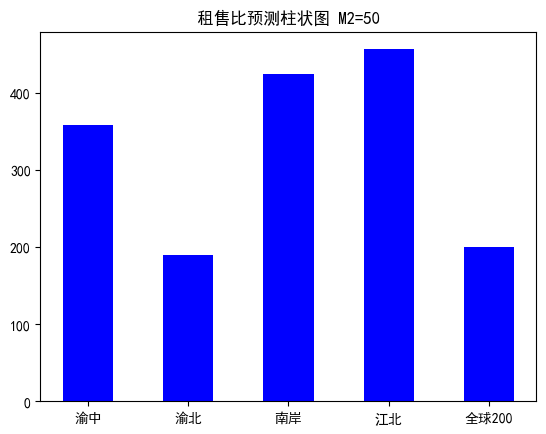

In [170]:
import matplotlib.pyplot as plt

# 计算租售比
Ratio1=int(result_buy.predict(new_x_50_1)/result_rent.predict(new_x_50_1))
Ratio2=int(result_buy.predict(new_x_50_2)/result_rent.predict(new_x_50_2))
Ratio3=int(result_buy.predict(new_x_50_3)/result_rent.predict(new_x_50_3))
Ratio4=int(result_buy.predict(new_x_50_4)/result_rent.predict(new_x_50_4))

print('渝中租售比:',int(Ratio1),'\n')
print('渝北租售比:',int(Ratio2),'\n')
print('南岸租售比:',int(Ratio3),'\n')
print('江北租售比:',int(Ratio4),'\n')

# 绘图

# 设置字体，防止无法显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

catagory=['渝中','渝北','南岸','江北','全球200']
value=[Ratio1,Ratio2,Ratio3,Ratio4,200]
plt.bar(catagory,value,width=0.5,color='blue')
plt.title('租售比预测柱状图 M2=50')
plt.show()


#### Plot B SquareMeter=100

渝中租售比: 383 

渝北租售比: 275 

南岸租售比: 384 

江北租售比: 467 



C:\Users\86188\AppData\Local\Temp\ipykernel_23056\2638754834.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ratio1=int(result_buy.predict(new_x_100_1)/result_rent.predict(new_x_100_1))
C:\Users\86188\AppData\Local\Temp\ipykernel_23056\2638754834.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ratio2=int(result_buy.predict(new_x_100_2)/result_rent.predict(new_x_100_2))
C:\Users\86188\AppData\Local\Temp\ipykernel_23056\2638754834.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (De

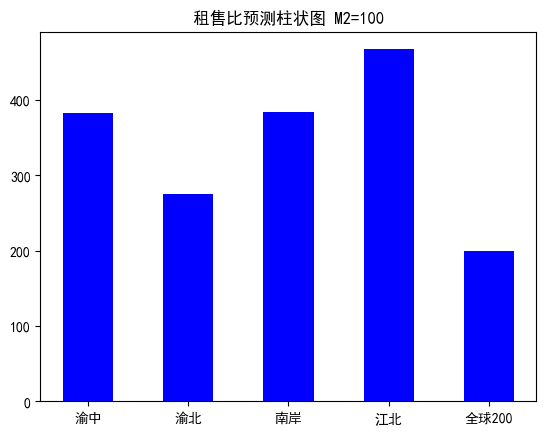

In [174]:
import matplotlib.pyplot as plt

# 计算租售比
Ratio1=int(result_buy.predict(new_x_100_1)/result_rent.predict(new_x_100_1))
Ratio2=int(result_buy.predict(new_x_100_2)/result_rent.predict(new_x_100_2))
Ratio3=int(result_buy.predict(new_x_100_3)/result_rent.predict(new_x_100_3))
Ratio4=int(result_buy.predict(new_x_100_4)/result_rent.predict(new_x_100_4))

print('渝中租售比:',int(Ratio1),'\n')
print('渝北租售比:',int(Ratio2),'\n')
print('南岸租售比:',int(Ratio3),'\n')
print('江北租售比:',int(Ratio4),'\n')

# 绘图

# 设置字体，防止无法显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

catagory=['渝中','渝北','南岸','江北','全球200']
value=[Ratio1,Ratio2,Ratio3,Ratio4,200]
plt.bar(catagory,value,width=0.5,color='blue')
plt.title('租售比预测柱状图 M2=100')
plt.show()
